# What's in a Name?

Here, we explore a dataset of first names of babies born in the US, spanning more than a 
100 years.

In [1]:
%%capture
import pandas as pd
import numpy as np
from wquantiles import quantile

# plotting libraries
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14, 6)
plt.style.use('seaborn-darkgrid')
import plotly.express as px

In [2]:
# read in data from zip file

babynames = pd.read_csv('names.csv.gz')
babynames.head()                  

,name,sex,births,year
0,Mary,F,54478,1959
1,Susan,F,41600,1959
2,Linda,F,40410,1959
3,Karen,F,36773,1959
4,Donna,F,36464,1959


# Data Exploration

The dataset contains only 4 columns, however there are many interesting questions we can explore. Below are a few of the questions we will explore.

1. What are the most popular names?
2. How can we estimate a person's age from their name?

# Popular Names

In [3]:
# gather the five most popular male and female names of the decade starting in 2011

popular_names = ( 
babynames
    .query('year > 2010')
    .groupby(['name','sex'])[['births']]
    .sum()
    .sort_values(by=['sex','births'], ascending=False)
    .groupby('sex')
    .head()
    .reset_index() # flattens dataframe

)

popular_names

,name,sex,births
0,Noah,M,184785
1,Liam,M,182448
2,William,M,155180
3,Mason,M,152832
4,Jacob,M,150015
5,Emma,F,192985
6,Olivia,F,184797
7,Sophia,F,173226
8,Isabella,F,159407
9,Ava,F,153254


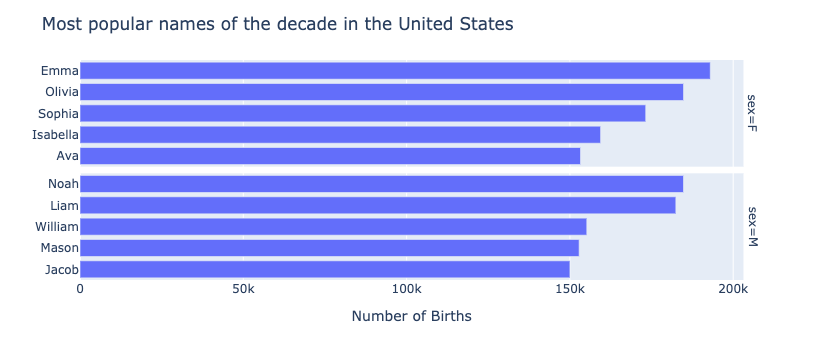

In [4]:
# plot horizontal bar plot of the number of births faceted by sex

fig = px.bar(
    popular_names.iloc[::-1], # reverse name order
    x='births',
    y='name',
    facet_row='sex'
)

fig.update_layout(
    title='Most popular names of the decade in the United States',
    yaxis_title=None,
    yaxis2_title=None,
    yaxis2_matches=None,
    xaxis_title='Number of Births'
)

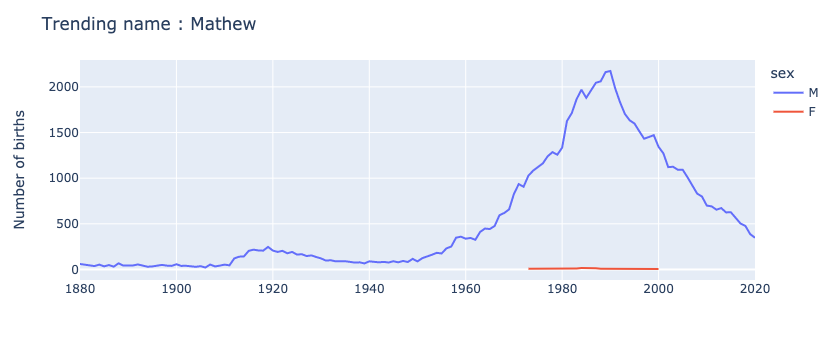

In [5]:
# plot the movement in number of babies by specific name

pd.options.plotting.backend='plotly' # please use plotly for interactive plots

def plot_name_trends(name):
    fig = (
        babynames
            .query('name == @name')
            .sort_values(by='year')
            .reset_index(drop=True)
            .plot.line(x='year', y='births', color='sex')
    )

    fig.update_layout(
        title=f"Trending name : {name}",
        xaxis_title=None,
        yaxis_title='Number of births'

    )
    return fig

plot_name_trends("Mathew")